# 1 Algoritmus k-mean 
V tomto cvičení vytvoříme k-mean model, který bude přiřazovat na základě měření květů kosatce do tří druhů.

Budeme vycházet z předpřipravených dat.

## 1.1 Načtení a rozdělení dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# načtení dat z numpy souboru
my_arrays = np.load("iris_numpy.npz")
X = my_arrays['arr_0']
Y = my_arrays['arr_1']
X_norm = my_arrays['arr_2']
X_features = my_arrays['arr_3']

In [3]:
# načtení scalar a encoder
import joblib
scaler=joblib.load('classification_std_scaler.bin')
encoder=joblib.load('classification_encoder.bin')

In [4]:
# rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X_norm, Y, test_size=0.2)

## 1.2 Určení počtu k segmentů

In [5]:
# zjištění, kolik segmentů je optimálních
# z analýzy dat víme, že budeme určovat 3

# zkusíme vytvořit model pro více k a budeme sledovat inertia_ 
# inertia_  je součet čtvercových vzdáleností vzorků od jejich nejbližšího středu shluku, vážený váhami vzorků, pokud jsou uvedeny

from sklearn.cluster import KMeans
inertia_list = []
for num_clusters in range(1, 10):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 10)
    kmeans_model.fit(X_norm)
    inertia_list.append(kmeans_model.inertia_)

G:\Projects\BMLAI\AI\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "G:\Projects\BMLAI\AI\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

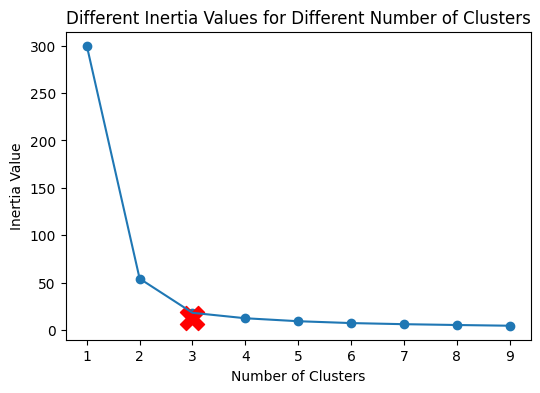

In [6]:
# Vhodné k zjistíme vynesením interial_ do elbow (loket) grafu
# Optimální počet k je v místě, kde se graf naposledy výrazně láme

plt.figure(figsize=(6,4))
plt.plot(range(1,10),inertia_list)
plt.scatter(range(1,10),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.title("Different Inertia Values for Different Number of Clusters")

## 1.3 Trénování K-mean 

In [7]:
# Vytvoření a natrénování k-mean modelu
kmean_model = KMeans(n_clusters=3, random_state= 2, n_init=10)
kmean_model.fit(X_train)

KMeans(n_clusters=3, n_init=10, random_state=2)

In [8]:
# K-mean si id clusteru volí náhodně a ve vstupních datech nejsou správné výsledky
# Pro zjištění přesnosti clusteru budeme muset sladit id clusteru, které vrací k-mean s id clusteru, které zvolil label_encoded

# Modelu dáme vyhodnotit typické hodnoty pro iris setosa, iris vericolor a iris_virginice
# Ukládáme si id, které vráti k-mean do pole

x_new=scaler.transform ([[1.4, 0.2]])
y_new=kmean_model.predict(x_new)
setosa_k_id=y_new[0]

x_new=scaler.transform ([[4.3, 1.3]])
y_new=kmean_model.predict(x_new)
versicolor_k_id=y_new[0]

x_new=scaler.transform ([[5.1, 2.3]])
y_new=kmean_model.predict(x_new)
virginica_k_id=y_new[0]
map_kmeans=[setosa_k_id, versicolor_k_id, virginica_k_id]
print (map_kmeans)

[np.int32(1), np.int32(2), np.int32(0)]


In [9]:
# zobrazení souřadnice center
kmean_model.cluster_centers_

array([[ 1.03396431,  1.14455648],
       [-1.30896235, -1.26218035],
       [ 0.30783301,  0.1723125 ]])

## 1.4 Předpověď modelu

In [10]:
Y_pred_train = kmean_model.predict(X_train)
Y_pred_test = kmean_model.predict(X_test)

In [11]:
# přemapování id clusteru na správné odpovědi label_encode
for i in range(Y_pred_train.shape[0]):
    Y_pred_train[i]=map_kmeans[Y_pred_train[i]]
    
for i in range(Y_pred_test.shape[0]):
    Y_pred_test[i]=map_kmeans[Y_pred_test[i]]    

## 1.5 Vizualizace modelu

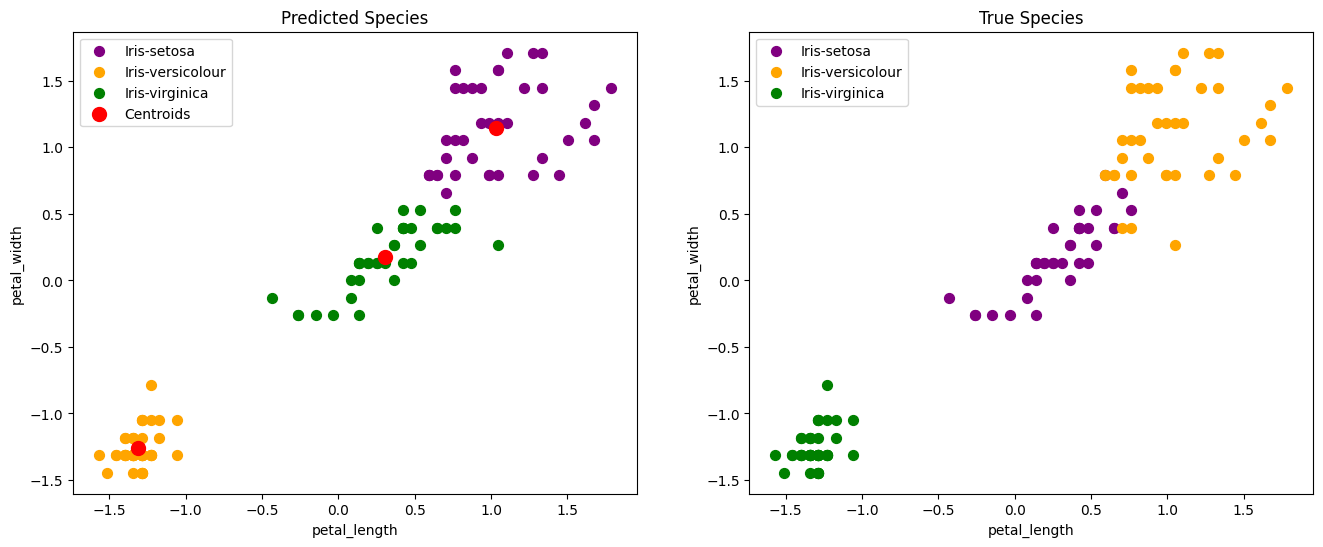

In [12]:
# Trénovací hodnoty
plt.figure(figsize=(16,6))

# predpovevi
plt.subplot(1,2,1)
plt.scatter(X_train[Y_pred_train == map_kmeans[0], 0], X_train[Y_pred_train == map_kmeans[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[Y_pred_train == map_kmeans[1], 0], X_train[Y_pred_train == map_kmeans[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[Y_pred_train == map_kmeans[2], 0], X_train[Y_pred_train == map_kmeans[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('Predicted Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
# centroid
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

# Skutecne hodnoty
plt.subplot(1,2,2)
plt.scatter(X_train[Y_train == map_kmeans[0], 0], X_train[Y_train == map_kmeans[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[Y_train == map_kmeans[1], 0], X_train[Y_train == map_kmeans[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[Y_train == map_kmeans[2], 0], X_train[Y_train == map_kmeans[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('True Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')

plt.legend()

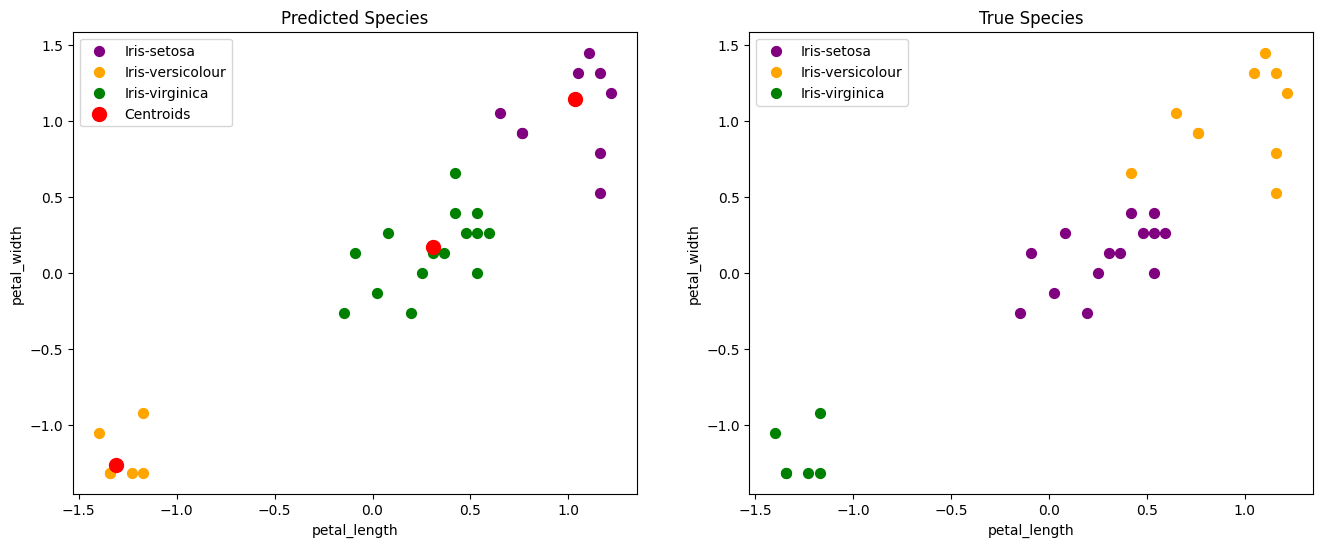

In [13]:
# Testovací hodnoty
plt.figure(figsize=(16,6))

# predpovedi
plt.subplot(1,2,1)
plt.scatter(X_test[Y_pred_test == map_kmeans[0], 0], X_test[Y_pred_test == map_kmeans[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_test[Y_pred_test == map_kmeans[1], 0], X_test[Y_pred_test == map_kmeans[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_test[Y_pred_test == map_kmeans[2], 0], X_test[Y_pred_test == map_kmeans[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('Predicted Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
# centroid
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

# Skutecne hodnoty
plt.subplot(1,2,2)
plt.scatter(X_test[Y_test == map_kmeans[0], 0], X_test[Y_test == map_kmeans[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_test[Y_test == map_kmeans[1], 0], X_test[Y_test == map_kmeans[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_test[Y_test == map_kmeans[2], 0], X_test[Y_test == map_kmeans[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('True Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
plt.legend()

## 1.5 Hodnocení modelu

- accuracy = počet správných odpovědí / počet odpovědí
- true positive rates (recall, specifity) = TP / (TP + FN)     pacient má chorobu a byl dobře diagnostikován
- true negative rates (Sensitivity)       = TN / (TN + FP)     pacient nemá chorobu a byl dobře diagnostikován
- precision (positive predictive values)  = TP / (TP + TN)     míra přesnosti, kdy byl diagnostikován jako pozitivní
- F measure (harmonický průměr precision a recall) = 2 * (precision * recall) / (precision + recall)
- accurary = (TP + TN) / (N + P)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [15]:
# předpovědi pro testovací data
Y_pred=kmean_model.predict(X_norm)

In [16]:

encoder.inverse_transform(Y_pred)

for i in range(Y_pred.shape[0]):
    Y_pred[i]=map_kmeans[Y_pred[i]]

In [17]:
# Základni statistika
import collections
collections.Counter(Y_pred)

Counter({np.int32(0): 52, np.int32(2): 50, np.int32(1): 48})

<Axes: >

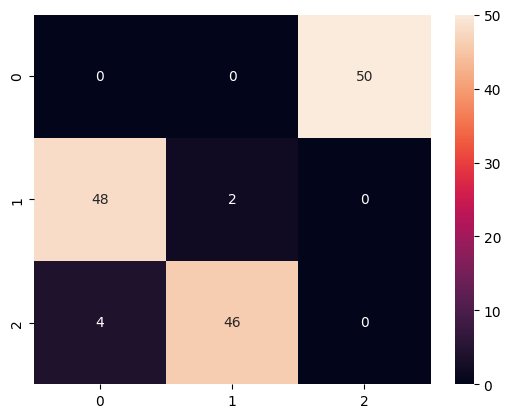

In [18]:
# Confusion matrix
cf_matrix=confusion_matrix(Y, Y_pred)
sns.heatmap(cf_matrix, annot=True)

In [19]:
# Skóre
score=accuracy_score(Y, Y_pred)
print (score)

0.013333333333333334


## 1.6 Uložení modelu

In [20]:
import pickle
filename = 'kmean_model.sav'
pickle.dump(kmean_model, open(filename, 'wb'))

In [21]:
loaded_model = pickle.load(open(filename, 'rb'))

## 1.7 Ladění hyperparametrů

In [22]:
# K-mean algoritmus má různé parametry. Jedním z nich je způsob měření vzdálenosti
# Následující postup vypíše nejvhodnější kombinaci paramterů pro daná data

from sklearn.model_selection import GridSearchCV

select_params={
               'algorithm' :["lloyd", "elkan"],
              }

grid_kmean = GridSearchCV(kmean_model, select_params, cv=5)
grid_kmean.fit(X_norm)

print('Best parameters: {}'.format(grid_kmean.best_params_))
print('Best score on training set: {}'.format(grid_kmean.best_score_))

Best parameters: {'algorithm': 'lloyd'}
Best score on training set: -3.800588173627758


## 1.8 Vytvoření modelu ze předpřipravenou proměnnou

Vytvoříme nový model, který budou používat pouze jednu uměle vytvořenou proměnnou podle vzorce pental_width * pental_height.

In [23]:
# rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X_features.reshape(-1,1), Y, test_size=0.2)

In [24]:
# Natrénování modelu z jediné proměnné X_features = pental_width * penal_height
# Knihovna počítá, že X má více proměnných, proto musíme použít reshape
kmeanf_model = KMeans(n_clusters=3, random_state= 2, n_init=10)
kmeanf_model.fit(X_train)

KMeans(n_clusters=3, n_init=10, random_state=2)

In [25]:
# K-mean si id clusteru volí náhodně
# Přiřazení id podle typických hodnot

y_new=kmeanf_model.predict([[1.4 * 0.2]])
setosa_k_id=y_new[0]

y_new=kmeanf_model.predict([[4.3 * 1.3]])
versicolor_k_id=y_new[0]

y_new=kmeanf_model.predict([[5.1* 2.3]])
virginica_k_id=y_new[0]
map_kmeans=[setosa_k_id, versicolor_k_id, virginica_k_id]
print (map_kmeans)

[np.int32(1), np.int32(0), np.int32(2)]


In [26]:
Yf_pred=kmeanf_model.predict(X_test)

In [27]:
Yf_pred

array([2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [28]:
Y_test

array([2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 0, 1, 0, 0, 1])

In [29]:
# předpovědi pro testovací data
Yf_pred=kmeanf_model.predict(X_test)
for i in range(Yf_pred.shape[0]):
    Yf_pred[i]=map_kmeans[Yf_pred[i]]

<Axes: >

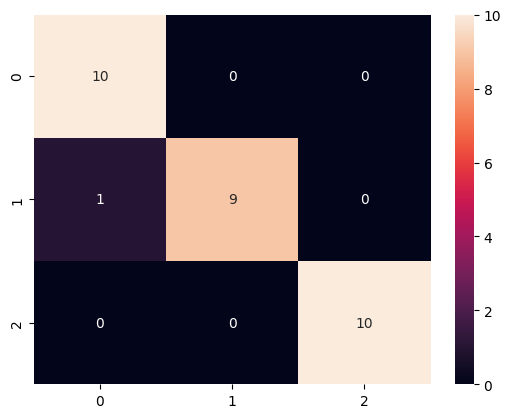

In [30]:
cf_matrix=confusion_matrix(Y_test, Yf_pred)
sns.heatmap(cf_matrix, annot=True)

In [31]:
# Skóre
accuracy_score(Y_test, Yf_pred)

0.9666666666666667

Text(0, 0.5, 'Prediction')

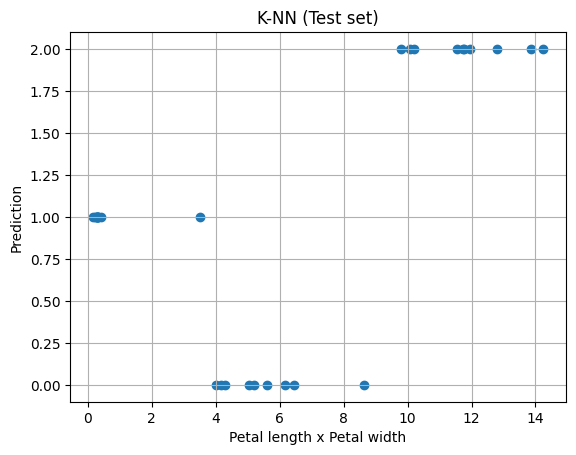

In [32]:
# Vizualizace modelu
X1=np.arange(start = X_test[:].min() - 1, stop = X_test[:].max() + 1, step = 0.01)
Yf_pred = kmeanf_model.predict (X_test.reshape(-1,1))
plt.scatter (X_test, Yf_pred)
plt.grid()
plt.title('K-NN (Test set)')
plt.xlabel('Petal length x Petal width')
plt.ylabel('Prediction')